In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/wine_data.csv',names=['ClassLabel','Alcohol','Malic Acid'],header=None,usecols=[0,1,2])

In [ ]:
df.head()

,ClassLabel,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [ ]:
df.sample(6)

,ClassLabel,Alcohol,Malic Acid
61,2,12.64,1.36
22,1,13.71,1.86
7,1,14.06,2.15
59,2,12.37,0.94
118,2,12.77,3.43
46,1,14.38,3.59


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Alcohol', ylabel='Density'>

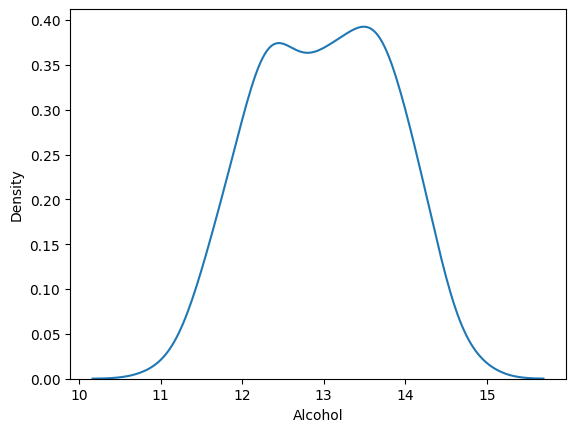

In [ ]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

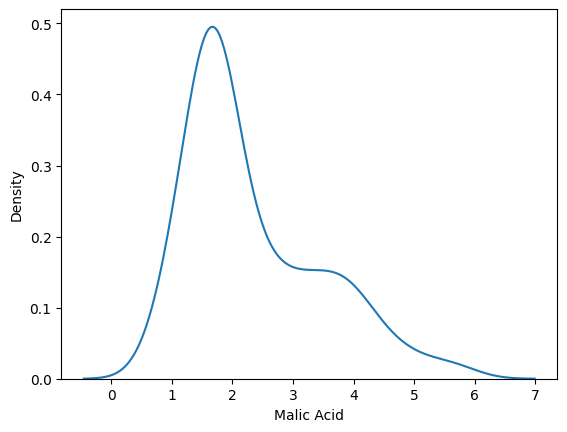

In [ ]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

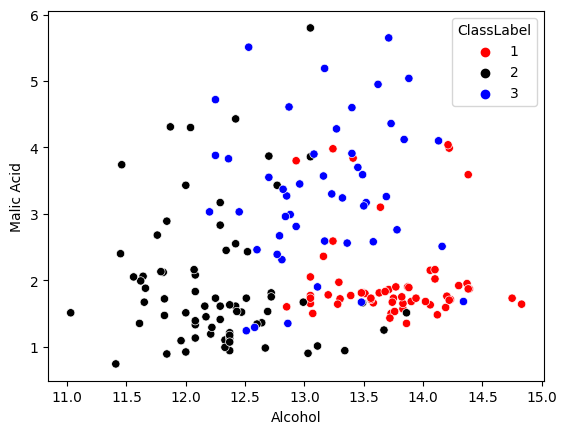

In [ ]:
color_palatte=['red','black','blue']

sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'],hue=df['ClassLabel'],palette=color_palatte)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'ClassLabel' is the target column
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:3],
                                                    df['ClassLabel'],
                                                     test_size=0.33
)


In [ ]:
X_train

,Alcohol,Malic Acid
51,13.83,1.65
155,13.17,5.19
61,12.64,1.36
48,14.10,2.02
11,14.12,1.48
...,...,...
36,13.28,1.64
76,13.03,0.90
19,13.64,3.10
122,12.42,4.43


In [ ]:
from sklearn.preprocessing import MinMaxScaler

Mm=MinMaxScaler()

In [ ]:
Mm.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled=Mm.transform(X_train)
X_test_scaled=Mm.transform(X_test)


In [ ]:
X_train,X_train_scaled


In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [ ]:
X_train,X_train_scaled

(     Alcohol  Malic Acid
 51     13.83        1.65
 155    13.17        5.19
 61     12.64        1.36
 48     14.10        2.02
 11     14.12        1.48
 ..       ...         ...
 36     13.28        1.64
 76     13.03        0.90
 19     13.64        3.10
 122    12.42        4.43
 129    12.04        4.30
 
 [119 rows x 2 columns],
       Alcohol  Malic Acid
 0    0.835821    0.185336
 1    0.638806    0.906314
 2    0.480597    0.126273
 3    0.916418    0.260692
 4    0.922388    0.150713
 ..        ...         ...
 114  0.671642    0.183299
 115  0.597015    0.032587
 116  0.779104    0.480652
 117  0.414925    0.751527
 118  0.301493    0.725051
 
 [119 rows x 2 columns])

In [ ]:
np.round(X_train.describe())

,Alcohol,Malic Acid
count,119.0,119.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,14.0,6.0


In [ ]:
np.round(X_train_scaled.describe())

,Alcohol,Malic Acid
count,119.0,119.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


<Axes: title={'center': 'After Scaling'}, xlabel='Malic Acid', ylabel='Alcohol'>

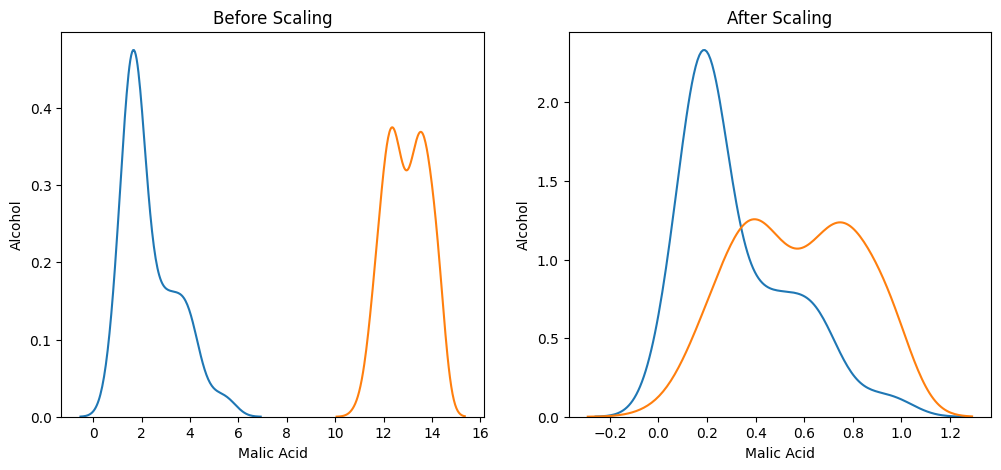

In [ ]:
figure ,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
ax1.set_xlabel("Malic Acid")
ax1.set_ylabel("Alcohol")
sns.kdeplot(X_train['Malic Acid'],ax=ax1)
sns.kdeplot(X_train['Alcohol'],ax=ax1)


ax2.set_title("After Scaling")
ax2.set_xlabel("Malic Acid")
ax2.set_ylabel("Alcohol")
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)



<Axes: title={'center': 'After Scaling'}, xlabel='Malic Acid', ylabel='Density'>

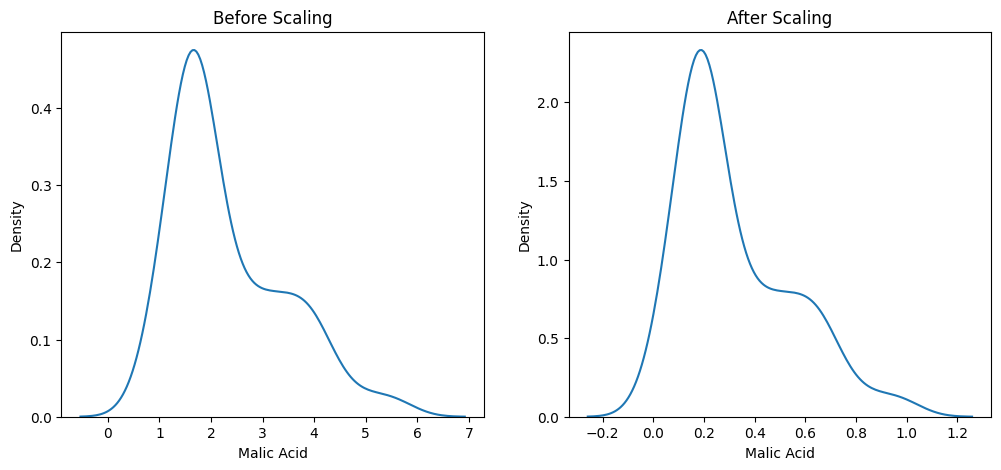

In [ ]:
figure ,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Malic Acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)


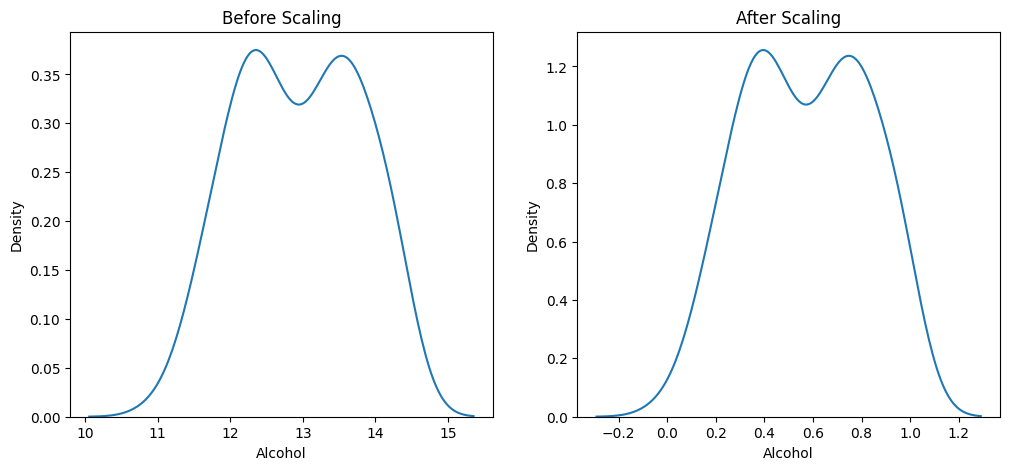

In [ ]:
figure ,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
plt.show()

# *Point to be noted here is that after sacling the values will lie in range of [0,1] but in the above graph as it is a probability distribution function it is comin more than 0,1 but in real it is not* #